# Watch a temperature : scan temperature *v* time

From *APS Python Training for Bluesky Data Acquisition*.

**Objective**

Measure the temperature for a short period and compute basics measures of the collected readings.

## Start the `instrument` package

Our instrument package is in the `bluesky` subdirectory here so we add that to the search path before importing it.

In [1]:
try:
    %load_ext dotenv
    %dotenv env.txt
except Exception:
    print(
        "Did not load file with environment variables."
        "  No problem.  Continuing ..."
    )

Did not load file with environment variables.  No problem.  Continuing ...


In [2]:
import os, sys
sys.path.append(os.path.abspath(os.path.join(".", "bluesky")))
from instrument.collection import *

I Tue-22:10:46 - ############################################################ startup


Activating auto-logging. Current session state plus future input saved.
Filename       : /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/.logs/ipython_console.log
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active


I Tue-22:10:46 - logging started
I Tue-22:10:46 - logging level = 10
I Tue-22:10:46 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/collection.py
I Tue-22:10:46 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/mpl/notebook.py
I Tue-22:10:48 - #### Bluesky Framework ####
I Tue-22:10:48 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/framework/check_python.py
I Tue-22:10:48 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/framework/check_bluesky.py
I Tue-22:10:50 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/framework/initialize.py
I Tue-22:10:52 - using databroker catalog 'training'
I Tue-22:10:52 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/instrument/framework/metadata.py
I Tue-22:10:52 - #### Devices ####
I Tue-22:10:52 - /home/mintadmin/Documents/projects/BCDA-APS/bluesky_training/bluesky/i

## Describe

Note the initial settings of the `temperature` (controller).  It's actually an EPICS *swait* record that simulates a temperature sensor and controller.  It has a setpoint, a readback, and a few other support attributes as shown.  A Random noise level is part of the simulation.  We'll compute that noise level from the standard deviation of the measurements.

In [3]:
listdevice(temperature)

============================= =================================== ==========================
name                          value                               timestamp                 
============================= =================================== ==========================
temperature_setpoint          25.0                                2021-08-31 22:11:01.140977
temperature                   24.94106202792401                   2021-08-31 22:11:01.350987
temperature_done              True                                2021-08-31 22:11:01.357132
temperature_calculation       A+max(-D,min(D,(B-A)))+C*(RNDM-0.5) 2021-08-31 22:11:01.146418
temperature_description       temperature                         2021-08-31 22:11:01.135663
temperature_max_change        2.0                                 2021-08-31 22:11:01.143759
temperature_noise             1.0                                 2021-08-31 22:11:01.143726
temperature_previous_value_pv gp:userCalc8.VAL                    2021

## Count
Use the bluesky RunEngine, `RE`, and a standard plan, `bp.count()`, to count the temperature.

In [4]:
RE(bp.count([temperature]))



Transient Scan ID: 361     Time: 2021-08-31 22:11:01
Persistent Unique Scan ID: '7651d1b2-3fd0-4035-a5c0-bcfbddf1ab82'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+-------------+
|   seq_num |       time | temperature |
+-----------+------------+-------------+
|         1 | 22:11:02.5 |    24.94106 |
+-----------+------------+-------------+
generator count ['7651d1b2'] (scan num: 361)


('7651d1b2-3fd0-4035-a5c0-bcfbddf1ab82',)

Take ten readings by adding the `num=10` keyword argument (a.k.a. *kwarg*).



Transient Scan ID: 362     Time: 2021-08-31 22:11:02
Persistent Unique Scan ID: '85fc03ee-6213-485c-bc2d-de38af3f5d56'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+-------------+
|   seq_num |       time | temperature |
+-----------+------------+-------------+
|         1 | 22:11:03.5 |    24.72391 |
|         2 | 22:11:03.6 |    24.72391 |
|         3 | 22:11:03.7 |    24.72391 |
|         4 | 22:11:03.8 |    24.72391 |
|         5 | 22:11:03.9 |    24.72391 |
|         6 | 22:11:03.9 |    24.72391 |
|         7 | 22:11:04.0 |    24.72391 |
|         8 | 22:11:04.0 |    24.72391 |
|         9 | 22:11:04.1 |    24.72391 |
|        10 | 22:11:04.2 |    24.72391 |
+-----------+------------+-------------+
generator count ['85fc03ee'] (scan num: 362)


('85fc03ee-6213-485c-bc2d-de38af3f5d56',)

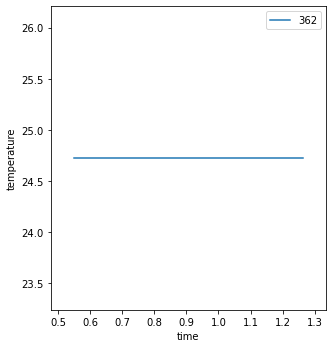

In [5]:
RE(bp.count([temperature], num=10))

Do all the readings look the same?  Perhaps there are only two different values (first one, then the other)?  That's because our measurements were only *reading* the temperature without waiting for it to update.  (If there are two different values, we caught the moment when EPICS updated the calculation.)  The table above showed `temperature_scanning_rate 5` which means EPICS is only updating every 2 seconds.

In [6]:
temperature.scanning_rate.get(as_string=True)

'2 second'

## Adjust the measurement interval
We need to slow down the measurement to this interval by adding the `delay=2` kwarg, sampling every 2 seconds.



Transient Scan ID: 363     Time: 2021-08-31 22:11:04
Persistent Unique Scan ID: 'd7a30c46-8a52-42cf-8d48-f4fa00768091'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+-------------+
|   seq_num |       time | temperature |
+-----------+------------+-------------+
|         1 | 22:11:05.5 |    25.17053 |
|         2 | 22:11:07.4 |    25.48036 |
|         3 | 22:11:09.4 |    25.05892 |
|         4 | 22:11:11.4 |    24.74045 |
|         5 | 22:11:13.4 |    24.68242 |
|         6 | 22:11:15.4 |    24.99445 |
|         7 | 22:11:17.4 |    24.91408 |
|         8 | 22:11:19.4 |    25.09196 |
|         9 | 22:11:21.4 |    25.29883 |
|        10 | 22:11:23.4 |    24.61695 |
+-----------+------------+-------------+
generator count ['d7a30c46'] (scan num: 363)


('d7a30c46-8a52-42cf-8d48-f4fa00768091',)

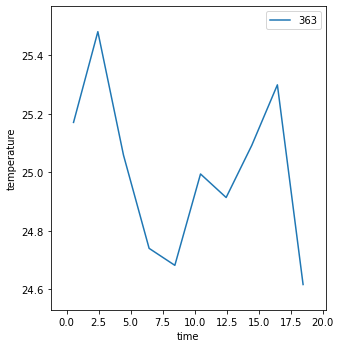

In [7]:
RE(bp.count([temperature], num=10, delay=2))

Let's reduce the update interval that EPICS uses, to the shortest interval EPICS provides, so our measurements do not take so long.

In [8]:
# print the list of possible values
print(temperature.scanning_rate.enum_strs)

# set the shortest interval, by name
temperature.scanning_rate.put(".1 second")
temperature.scanning_rate.get(as_string=True)

('Passive', 'Event', 'I/O Intr', '10 second', '5 second', '2 second', '1 second', '.5 second', '.2 second', '.1 second')


'2 second'

## Collect our measurements
Repeat the measurement, this time with more observations.

Also, we'll add a metadata key:value pair so that later we can find this data more easily in the database.  Most plans take a `md={}` kwarg where the value is a Python dictionary with the key:value pair(s) to add to the run's metadata.



Transient Scan ID: 364     Time: 2021-08-31 22:11:25
Persistent Unique Scan ID: 'c65050de-dda4-4256-9e9d-b0e85b49f386'
New stream: 'baseline'
New stream: 'primary'
+-----------+------------+-------------+
|   seq_num |       time | temperature |
+-----------+------------+-------------+
|         1 | 22:11:26.7 |    24.50049 |
|         2 | 22:11:26.8 |    25.46643 |
|         3 | 22:11:26.9 |    25.20723 |
|         4 | 22:11:27.0 |    24.85201 |
|         5 | 22:11:27.1 |    25.31608 |
|         6 | 22:11:27.2 |    24.72856 |
|         7 | 22:11:27.3 |    25.07704 |
|         8 | 22:11:27.4 |    25.08740 |
|         9 | 22:11:27.5 |    25.15681 |
|        10 | 22:11:27.6 |    24.56575 |
|        11 | 22:11:27.7 |    25.48735 |
|        12 | 22:11:27.8 |    25.27728 |
|        13 | 22:11:27.9 |    25.24342 |
|        14 | 22:11:28.0 |    25.33719 |
|        15 | 22:11:28.1 |    25.07932 |
|        16 | 22:11:28.2 |    24.78258 |
|        17 | 22:11:28.3 |    24.83770 |
|        18 | 

('c65050de-dda4-4256-9e9d-b0e85b49f386',)

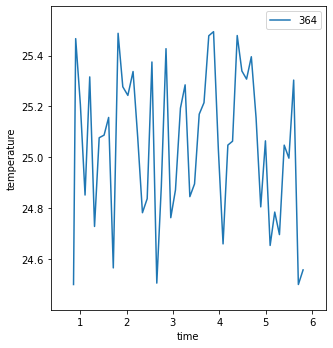

In [9]:
RE(bp.count([temperature], num=50, delay=0.1, md={"motive": "tscan"}))

## Get the data (from the database)
Let's get the measured data from the database now.  It's the most recent bluesky run, so an index of `-1` will identify it.

In [10]:
dataset = cat[-1].primary.read()

Let's get the values as a 1-D numpy array.

In [11]:
T = dataset["temperature"].values

## Compute the statistics
Use the methods of numpy arrays to compute maximum, mean, standard deviation, and minimum.  Looks nicer in a table.

In [12]:
table = pyRestTable.Table()
table.addLabel("measure")
table.addLabel("value")
table.addRow(("max", T.max()))
table.addRow(("mean", T.mean()))
table.addRow(("dev", T.std()))
table.addRow(("min", T.min()))
table.addRow(("#", len(T)))
print(table)

======= ==================
measure value             
======= ==================
max     25.49371328297856 
mean    25.045955291065845
dev     0.2941932973582167
min     24.500488288700694
#       50                
======= ==================



Let's replot that data for comparison.

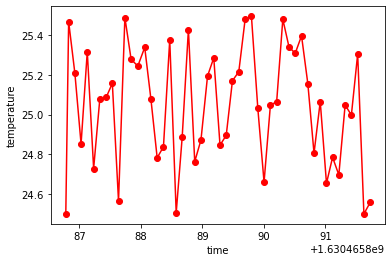

In [13]:
dataset["temperature"].plot(marker="o", color="red")